In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)

In [ ]:
from sklearn.datasets import load_iris

raw_data = load_iris()


In [ ]:
raw_data.keys()
all_data = raw_data.copy()

In [ ]:
data = all_data['data']
target = all_data['target'] 

In [ ]:
all_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(data=np.c_[data, target], columns=all_data['feature_names'] + ['kategoria'])


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
kategoria,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
df['kategoria'].value_counts()


0.0    50
1.0    50
2.0    50
Name: kategoria, dtype: int64

In [ ]:
sns.pairplot(df, hue='kategoria')

In [ ]:
df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kategoria
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
kategoria,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

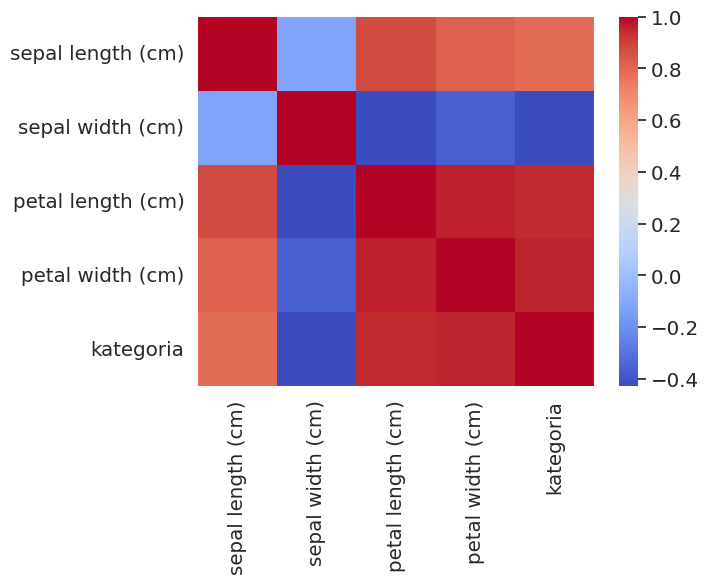

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [ ]:
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kategoria
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
data

In [ ]:
data = data[:, 2:5]



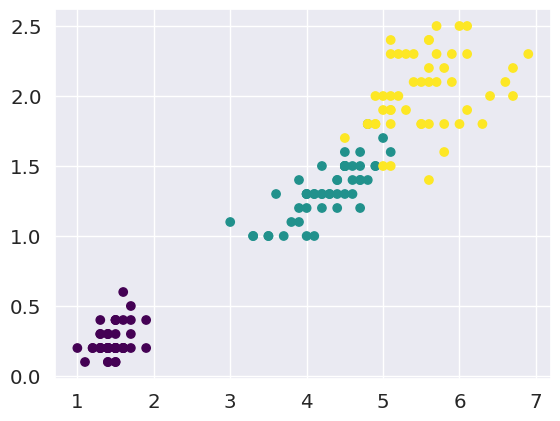

In [ ]:
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')

plt.show()

In [ ]:
#knn 

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(data, target)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
def rysowanie_granic(n_neighbors=3):
  classifier = KNeighborsClassifier(n_neighbors)
  classifier.fit(data, target)

  x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5 
  y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10, 8))
  plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
  plt.scatter(data[:, 0], data[:, 1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title('3-class classification')
  plt.show()


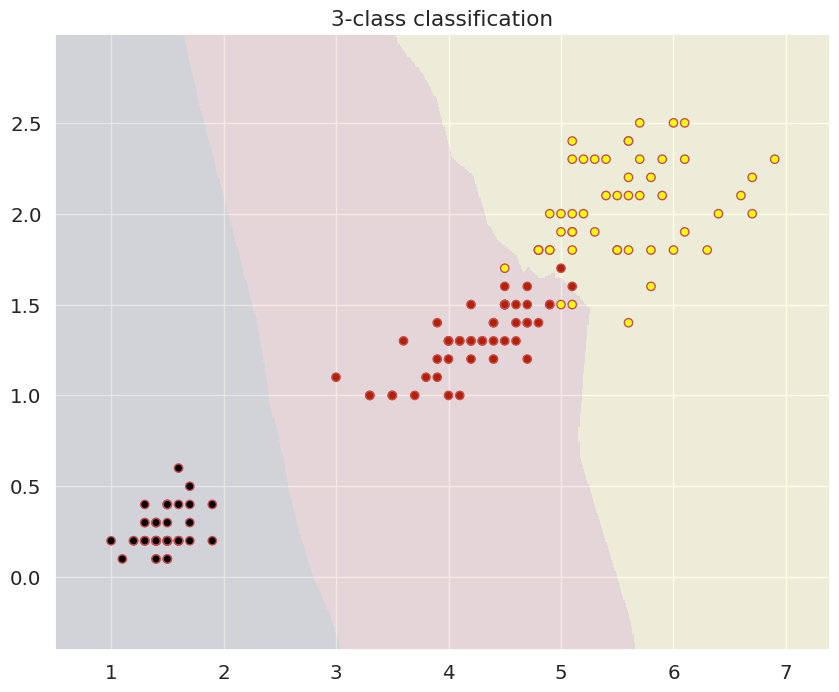

In [ ]:
rysowanie_granic(5)